In [1]:
import pandas as pd
import thulac
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re
import csv

In [2]:
myfile = '/Users/zhangmeng/Desktop/study/ESCP_SEP/NLP/sentiment/train_ dataset/labled.csv'
with open(myfile,'r',encoding = 'GB18030', errors = 'ignore') as f:
    raw_data = pd.read_csv(f)

In [3]:
raw_data = raw_data.rename(columns={"微博id": "ID", "微博发布时间": "time", '发布人账号':'user','微博中文内容':'content',
                        '微博图片':'pic', '微博视频':'video','情感倾向':'sentiment'})

In [30]:
df0 = raw_data
df0 = df0.drop(columns=['time','user','pic', 'video'])

# Understand data, check target value distribution and the distribution of Weibo length

Text(0.5,1,'sentiment(target) distribution')

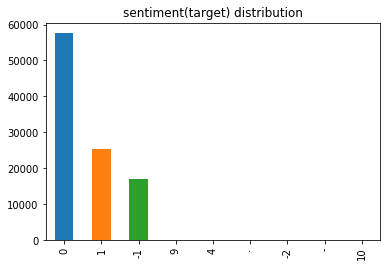

In [31]:
df0.sentiment.value_counts().plot.bar()
plt.title('sentiment(target) distribution')

In [34]:
df0['sentiment'] = df0['sentiment'].astype(str)
valid_value = ["0","1","-1"]
is_valid =  df0['sentiment'].isin(valid_value)
df0 = df0[is_valid]

Text(0.5,1,'sentiment(target) distribution')

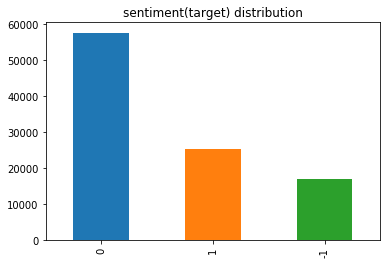

In [36]:
df0.sentiment.value_counts().plot.bar()
plt.title('sentiment(target) distribution')

Text(0.5,1,'sentiment(target) distribution')

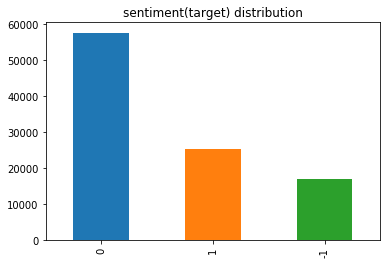

In [37]:
df0.sentiment.value_counts().plot.bar()
plt.title('sentiment(target) distribution')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0.5,1,'weibo length')

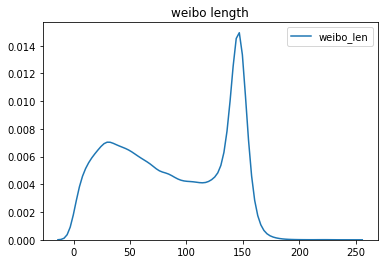

In [38]:
df0['weibo_len'] = df0['content'].astype(str).apply(len)
sns.kdeplot(df0['weibo_len'])
plt.title('weibo length')

Text(0.5,1,'weibo length new')

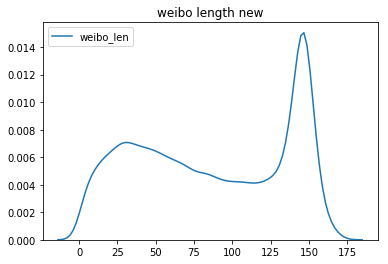

In [39]:
df1 = df0[df0.content.astype(str).apply(len)<=170]
sns.kdeplot(df1['weibo_len'])
plt.title('weibo length new')

# pre-cleaning, deleting or filtering unnecessary words like 'show more'

In [40]:
#remove "show more"
df1['content'] = df1['content'].astype(str).apply(lambda x : x.replace("展开全文", ""))
# remove symbol, number and letter
symbols = "[a-zA-Z0-9\s+\.\!\/_,$%^*()??;；：【】+\"\'\[\]\\]+|[+——！，;:。？《》、~@#￥%……&*（）“”.=-]+"
df1['content'] = df1['content'].astype(str).apply(lambda x : re.sub(symbols, '', x))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [41]:
pattern = re.compile(r'[^\u4e00-\u9fa5]')
df1['content'] = df1['content'].astype(str).apply(lambda x: re.sub(pattern, '', x))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [42]:
#tokenization using http://thulac.thunlp.org/
thu1 = thulac.thulac(seg_only=True)  #默认模式
df1['content'] = df1['content'].astype(str).apply(lambda x : thu1.cut(x,text = True))

Model loaded succeed


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
df1.content[0]

'写 在 年末 冬初 孩子 流感 的 第五 天 我们 仍然 没有 忘记 热情 拥抱 这 年 的 第一 天 带 着 一 丝 迷信 早晨 给 孩子 穿 上 红色 的 羽绒服 羽绒 裤祈祷 新 的 一 年 孩子 们 身体 康健 仍然 会 有 一 丝 焦虑 焦虑 我 的 孩子 为什 么 会 过早 的 懂事 从 两 岁 多 开始 关注 我 的 情绪 会 深沉 地 说 妈妈 你 终于 笑 了 这 句 话 像 刀子 一样 扎入 我'

In [44]:
df1.to_csv("precleaned.csv")

In [ ]:
myfile = './mystopwords.csv'
stopwords = pd.read_csv(myfile, delimiter='\n', header=None, encoding='utf-8', quoting=csv.QUOTE_NONE)
stopwords.shape

In [ ]:
# thu1 = thulac.thulac(seg_only=True)  #默认模式
# df1 = df0
# df1['content'] = df1['content'].astype(str).apply(lambda x : thu1.cut(x,text = True))
# #text = thu1.cut(df0.content[0], text=True)  #进行一句话分词
# #print(text)
# df1.head(10)

In [ ]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(df1['content'])
xtrain_count =  count_vect.transform(train_df['text_cut'])